In [15]:
%load_ext autoreload
%autoreload 2

from dataclasses import dataclass
from typing import Callable
import numpy.typing as npt

import numpy as np
import cvxpy as cp
from algos import opt_for_L, one_step, full_opt
from typing import Any
import numpy as np
# from throughput import read_graph_data, read_traffic_mat, solve_problem_with_flow
from pathlib import Path
import cvxpy as cp
import matplotlib.pyplot as plt

from paper_code.altorithm import gamma_for_budget
from paper_code.multicommodity_flow.process_graph import read_graph, read_traffic, solve_problem_with_flow
from paper_code.multicommodity_flow.graph_functions import GraphFunc
from paper_code.utils.drawer import get_fig_set_style

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from copy import deepcopy

p = Path('./datasets/topologies_with_traffic/germany50')

gr = read_graph(p)
b_max = gr['bandwidth']

# m сценариев, n -  размерность пространства поиска
m = 15
n = len(b_max)

# для эксперимента нужно определить стоимости аренды
# пропускных способностей с_a и c_b

gr['cost'] /= 1000
cost = gr['cost']  # стоимость обслуживания единицы пропускной способности
begin_cost = ((1/cost)**0.5) * 10 * (0.9 + np.random.rand(n) * 0.2)
additional_cost = begin_cost * (1.05 + np.random.rand(n) * 0.1)

# далее инициализируем параметры функций и посчитаем их в полученных точках


параметры для экспериментов генерировались так стоимости потоков есть в самом датасете. На их основе генерировались начальная стоимость аренды и стоимость внутри периода. Если пропускная способность стоит дешевле, то это более качественная пропускная полоса, поэтому стоимость такой полосы должна быть выше. Также считаем аренду дороже, чем обслуживание. Поэтому стоимости в начале периода генерировались как $(c_b)_i = (1/flow_cost) \xi$, где $\xi \sim U[9, 11]$. Стоимость аренды во время периода считаем выше: $(c_a)_i = (c_b)_i * \xi, \sim U[1.05, 1.15]$, то есть дороже от 5 до 15%. 

$a \sim v$

In [3]:
@dataclass
class rezult_handler:
    function: Callable
    x: npt.NDArray
    extra_x: npt.NDArray
    value: float

rezults = []
verbose = True
for i in range(m):
    # матрица корреспонденций - то что отличает разные функции
    # после считывания проводим некоторое прореживание чтобы сделать задачу легче
    traffic_mat = read_traffic(p / "tunnel_data" / f"Tunnel{i}.csv")
    scenario_fraction = 0.3
    traffic_mat = (2. * (np.random.rand(*traffic_mat.shape) > scenario_fraction)) * traffic_mat 
    f = GraphFunc(gr['graph'], gr['cost'], traffic_mat, additional_cost)
    
    b_i = b_max * 4 * (np.random.rand(n)* 0.4 + 0.6)
    v = f(b_i, solver = cp.OSQP)
    
    extra_bw = f.rez['extra_bandwidth'] 
    tmp_rez = rezult_handler(function = f,
                             x = b_i,
                             extra_x=extra_bw,
                             value= v)
    rezults.append(tmp_rez)
    if verbose:
        st = "flow cost: {}\nbandwidth cost: {}\nextra bw cost: {}".format(
            v - additional_cost@ extra_bw,
            begin_cost@ b_i,
            additional_cost @ extra_bw
        )
        print(st)


/Users/ilgam/miniconda3/envs/diploma/lib/python3.12/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.11420242571906286
flow cost: 0.07656956996346514
bandwidth cost: 0.11937421189620454
extra bw cost: 0.03763285575559771


/Users/ilgam/miniconda3/envs/diploma/lib/python3.12/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.12026850090031299
flow cost: 0.076834069158162
bandwidth cost: 0.11725667852959032
extra bw cost: 0.04343443174215099


/Users/ilgam/miniconda3/envs/diploma/lib/python3.12/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.12954593880000193
flow cost: 0.08047511956580487
bandwidth cost: 0.11639151052751875
extra bw cost: 0.04907081923419705
0.1289653747728235
flow cost: 0.08089296368398913
bandwidth cost: 0.11816610248143476
extra bw cost: 0.048072411088834366
0.08935823434169235
flow cost: 0.06209407752227246
bandwidth cost: 0.1190453653603471
extra bw cost: 0.027264156819419887
0.10155051487556796
flow cost: 0.06807467668237083
bandwidth cost: 0.11947532934500024
extra bw cost: 0.03347583819319714


/Users/ilgam/miniconda3/envs/diploma/lib/python3.12/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.10701532289331794
flow cost: 0.07107265890054212
bandwidth cost: 0.11929445170207724
extra bw cost: 0.03594266399277581
0.09856662100120149
flow cost: 0.06714031547766378
bandwidth cost: 0.11715013375340583
extra bw cost: 0.031426305523537715
0.09044352802449435
flow cost: 0.06429395628931371
bandwidth cost: 0.11904600592609983
extra bw cost: 0.02614957173518064


/Users/ilgam/miniconda3/envs/diploma/lib/python3.12/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.11776947845651191
flow cost: 0.07607685367119853
bandwidth cost: 0.11650544628712092
extra bw cost: 0.04169262478531338
0.0602042788740331
flow cost: 0.04884718179415716
bandwidth cost: 0.11793008186772977
extra bw cost: 0.011357097079875941
0.10557453890335487
flow cost: 0.07142574650944299
bandwidth cost: 0.11854911663799272
extra bw cost: 0.034148792393911886
0.04013948501296772
flow cost: 0.03081432921605918
bandwidth cost: 0.1190051155988163
extra bw cost: 0.009325155796908539
0.1341681611701721
flow cost: 0.08249728850273527
bandwidth cost: 0.11756064921774917
extra bw cost: 0.05167087266743684
0.08307090693210153
flow cost: 0.06116139594354729
bandwidth cost: 0.11985280278251259
extra bw cost: 0.02190951098855425


/Users/ilgam/miniconda3/envs/diploma/lib/python3.12/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [10]:
def test_point(x):
    """
    вычисляем значения всех функций в найденной точке
    """
    rez = []
    for r in rezults:
        f = r.function
        v = f(x, solver = cp.OSQP, max_iter = 30000)
        rez.append(v)
    return np.array(rez)

протестируем несколько разных начальных бюджетов

In [11]:
from joblib import Parallel, delayed
@dataclass
class budget_rezult_handler:
    budget: float
    x: npt.NDArray
    gamma: float
    values: list[float]
    ratios: list[float] = None

x_s = np.stack([r.x for r in rezults], axis = 0)
v_s = np.array([r.value for r in rezults])
L_s = np.array([1 for _ in rezults]) # используем неточные значения


budgets_used = x_s @ begin_cost
b = np.mean(budgets_used)
budgets = np.linspace(0.1 * b, 1.6 * b, 12)

def clip_func(x,y):
    """
    default function for clip, 
    which does not take into account monotonicity
    """
    return cp.maximum(y - x, 0)

clip_functions = [clip_func for _ in v_s]
def get_b(b, norm = 1):
    x, gamma = gamma_for_budget(b, begin_cost, x_s, v_s, L_s,
                                clip_functions, norm= norm, 
                                verbose = False, hint=True)
    values = test_point(x)
    tmp_rez = budget_rezult_handler(
        budget=b,
        x = x,
        gamma=gamma,
        values= values,
        )
    return tmp_rez

del_get_b = delayed(get_b)

budget_norm_rez = dict()
for norm in [1,2, "inf"]:
    budget_rez = Parallel(n_jobs= 7)(del_get_b(b, norm) for b in budgets)            
    budget_norm_rez[norm] = budget_rez


0.17564910759303298
0.16650303246183018
0.1469247854279019
0.1356057843793481
0.12725817459935415
0.18151803926745913
0.11740498917530963
0.1714181261259165
0.16012831699762348
0.18805827217697182
0.13925749900115228
0.15014793348595762
0.13123005211045255
0.12305680065616814
0.1777429540145947
0.18819651048385266
0.1643995990965895
0.1581461898377442
0.13083080301886732
0.14756141552175772
0.14432381575945072
0.14005288977764058
0.17158000162913223
0.17847893834202513
0.15803909791433068
0.13163240107479554
0.1479991801384439
0.1400257285235934
0.13414243727306677
0.15925380986849563
0.1659554517180315
0.17198534983083308
0.10741272505171608
0.09157997657240376
0.15715555632147202
0.10026397889439159
0.11777068517091177
0.14914558866490132
0.12968307977753826
0.14790426548383237
0.11946381526054893
0.10425026883379054
0.1565743095396064
0.1115629272332377
0.1426687364645571
0.17793245996472323
0.1297036968680214
0.12629352468135246
0.11015546088860613
0.1472841923531803
0.111498603724

/Users/ilgam/miniconda3/envs/diploma/lib/python3.12/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.11718958371853457
0.13986907209045474
0.16015473122994012
0.17226736971052217
0.14963571937250852
0.13127671534308677
0.12379941518882209
0.12259114144912998
0.14470690776742107
0.16425809793102653
0.17621133898965266
0.15384214118469378
0.13673858573441713
0.12930420621971303
0.13125364704825615
0.18374746110187995
0.15347100574688824
0.17260281681450992
0.162053914341796
0.14523135871056378
0.13782639698028262
0.13154696716097017
0.18419496757192905
0.17312999311314634
0.15404288933116722
0.16292919269874068
0.13838000726922903
0.09157693922491551
0.14573062704862436
0.1403598315138095
0.1289650837402403
0.11059439334484245
0.11885740781581798
0.10340254311661362
0.0971542820748449
0.10468801171421913
0.1541934441871175
0.13237199166665867
0.12429032085304179
0.14249696123646005
0.11046806762931531
0.11699790953438952
0.16153136532371987
0.11040451380722936
0.14015009168798684
0.1500187312533164
0.13137034677354756
0.11658109802364794
0.15345984451082864
0.12341045425955673
0.10033

/Users/ilgam/miniconda3/envs/diploma/lib/python3.12/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.1781424756454913
0.1441457468145117
0.16856920641407735
0.08584444044931544
0.15193500887051117
0.12390713391382929
0.11182958525800323
0.11359577975761646
0.10485001864587182
0.09100587594310362
0.0974408510090939
0.10870601204625241
0.10852658317445527
0.10863528506457504
0.11680334936309972
0.10867750879804912
0.11357236207730452
0.11343145555753233
0.12586016001595848
0.11349444754834485
0.1135811826772284
0.12239243290223956
0.12217538672350052
0.1262370836646974
0.12229564948170908
0.1223922554522809
0.12329885922898233
0.12314122988521772
0.08747744151808412
0.12319286229522207
0.12322823896617775
0.08533049512593338
0.08519351067721449
0.09969157987049697
0.08535476189930191
0.08529908863835844
0.09629949947029626
0.09650376775558372
0.10510858994848758
0.09651433116968967
0.09640631174773313
0.10197112488698429
0.10178889324051964
0.10198966288205875
0.0950564032039648
0.10189841662032444
0.09189476428488066
0.09206984648549296
0.09203806140131167
0.0888596449238129
0.085905

Отображаем полученные результаты

In [12]:
values = np.array([(r.x @ begin_cost + r.value) for r in rezults])
ratios = np.array([(np.mean((r.x @ begin_cost + r.values)/values), np.std(r.values/values)) for r in budget_rez]).T
gammas = [r.gamma for r in budget_rez]
# values, ratios, gammas
values = np.array([(r.value) for r in rezults])
ratios = np.array([(np.mean((r.values)/values), np.std(r.values/values)) for r in budget_rez]).T
gammas = [1 + r.gamma for r in budget_rez]
# values, ratios, gammas

b

In [108]:
a = test_point(budget_norm_rez[1][2].x)


0.11081721050672401
Solver interrupted
OSQP solve error!
0.11659994713015667
0.09816905053496496
0.10072096837001884


In [46]:
budget_norm_rez[1][2].values = a

1 <class 'list'>
(2, 12)
2 <class 'list'>
(2, 12)
inf <class 'list'>
(2, 12)


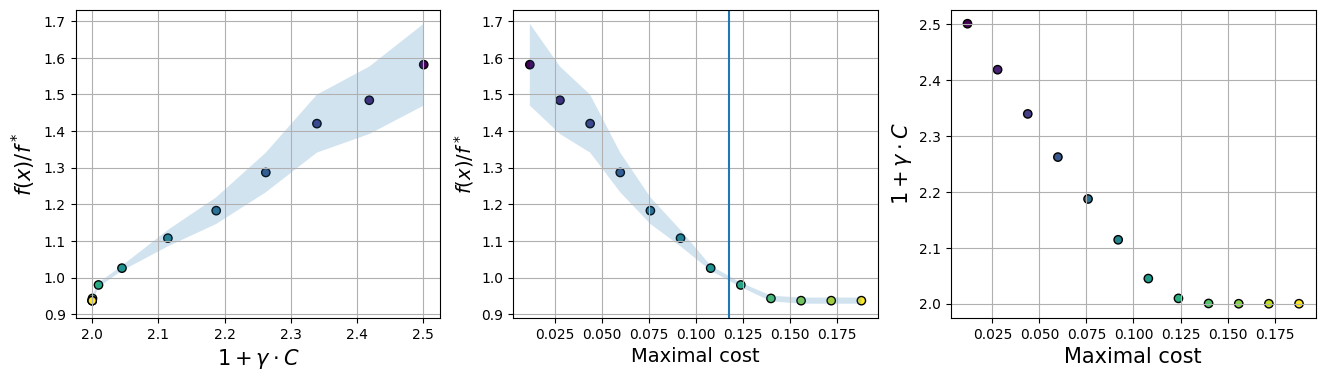

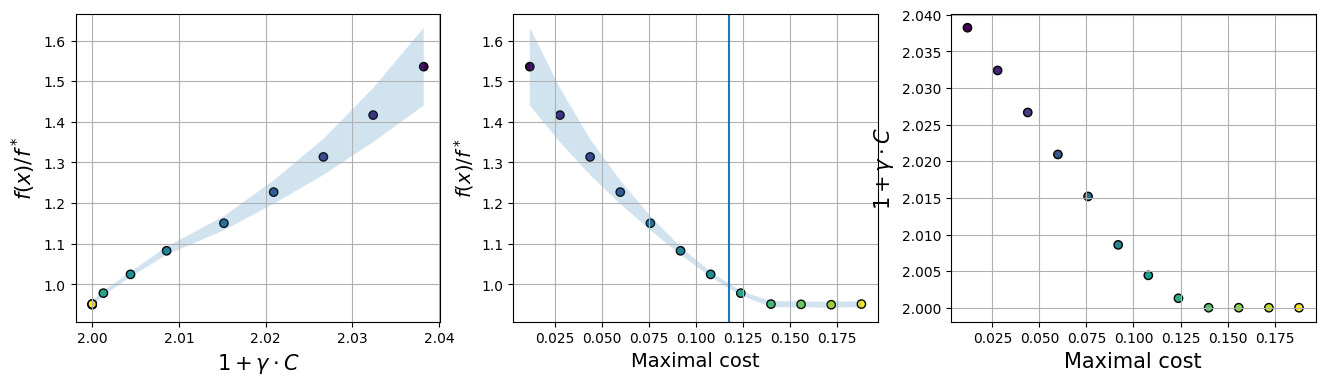

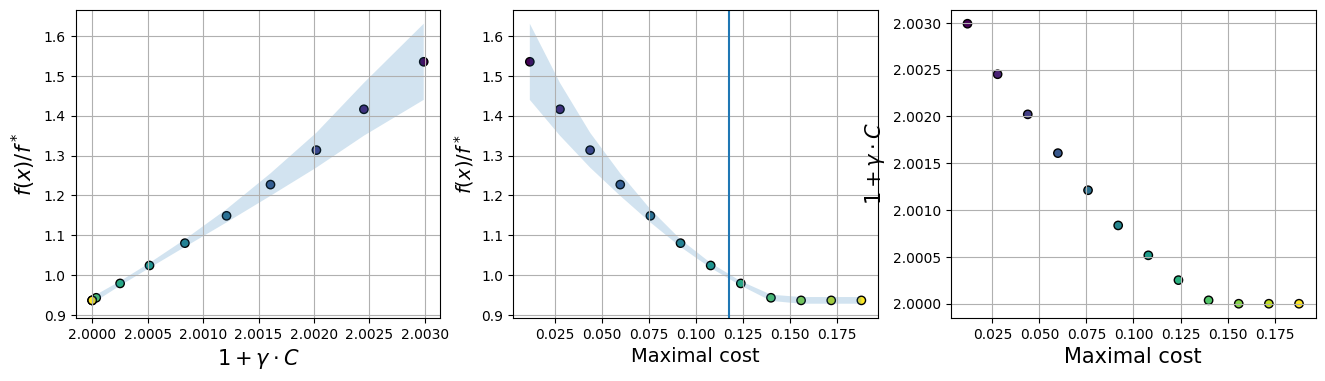

In [13]:
from paper_code.utils.drawer import plot_ratios

exp_ratios = []
for k, v in budget_norm_rez.items():
    print(k, type(v))
    budget_rez = v
    values = np.array([(r.value) for r in rezults])
    ratios = np.array([(r.values/values, r.values/values) for r in budget_rez]).T
    exp_ratios.append(ratios)
    ratios = np.array([ratios[:,0].mean(0), ratios[:,1].std(0)])
    print(ratios.shape)
    gammas = [1 + r.gamma for r in budget_rez]

    x1 = "Maximal cost"
    y1 = r"$f(x)/f^*$"
    l1 = r"$1 + \gamma \cdot C$"
    fig, ax = plot_ratios(ratios, gammas, budgets, x1,y1,l1, ratios_procecced=True)
    ax[1].axvline(x=np.mean(budgets_used))

exp_ratios = np.array(exp_ratios)[:,:,0]

(12, 15) (2, 12) (12,) (12,)
(12, 15) (2, 12) (12,) (12,)
(12, 15) (2, 12) (12,) (12,)


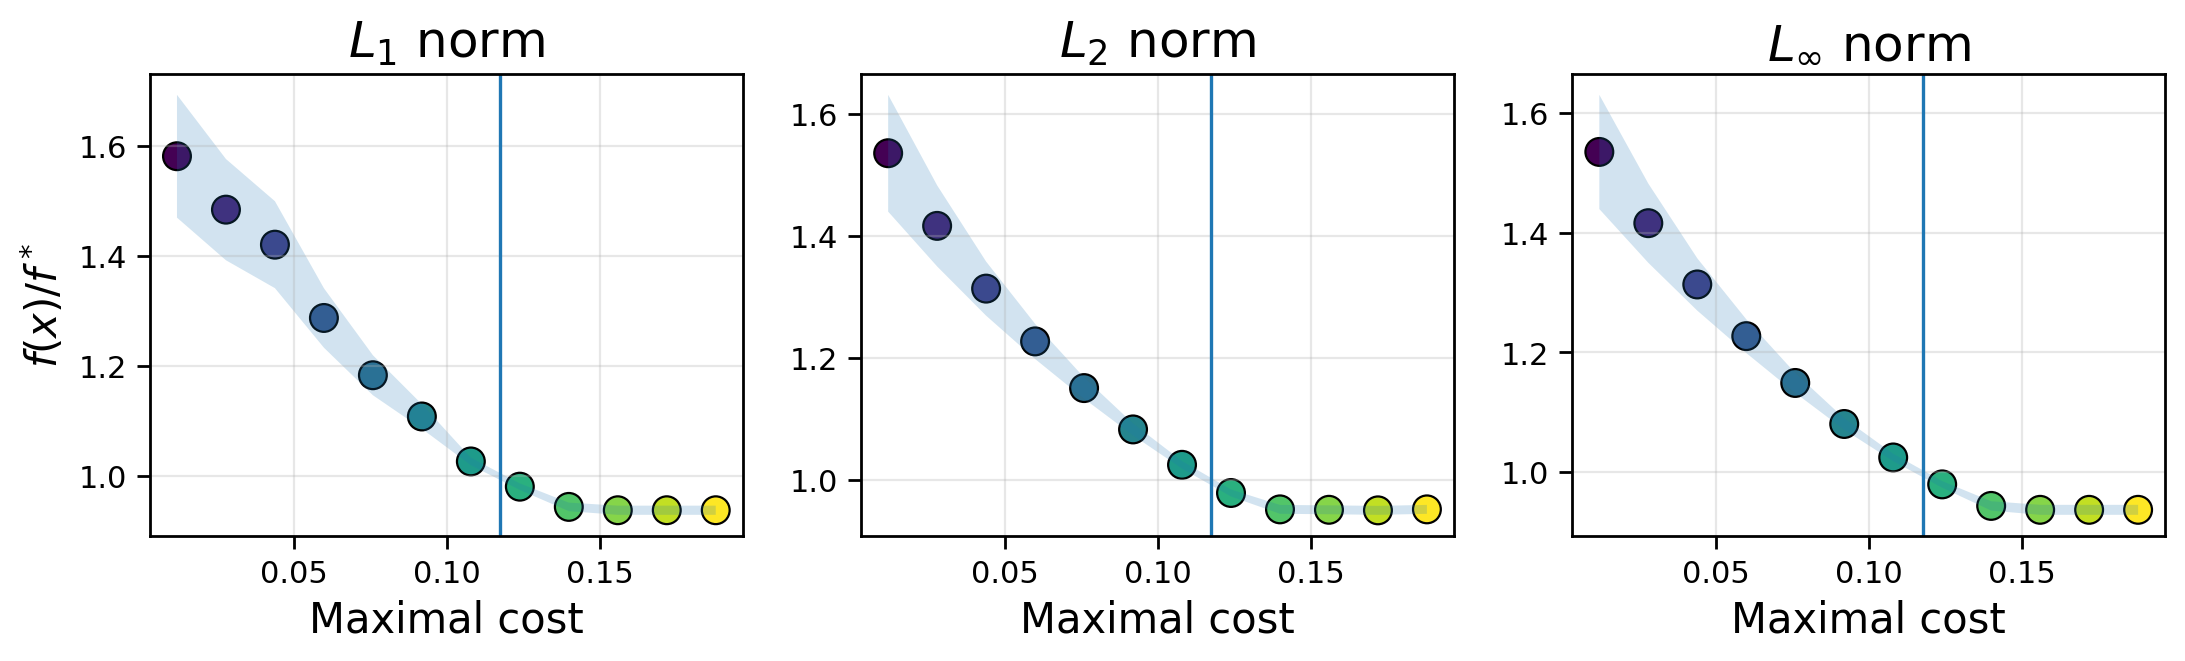

In [16]:
fig, ax = get_fig_set_style(None, (1,3), (13,3))
names = [r"$L_1$ norm",r"$L_2$ norm",r"$L_\infty$ norm"]
for i, rez in enumerate(exp_ratios):
    ratios = rez.T
    ratios_stat = np.array([(np.mean(r), np.std(r)) for r in ratios]).T
    colors = np.linspace(0, 2., len(ratios_stat[0]))
    print(ratios.shape, ratios_stat.shape, colors.shape, budgets.shape)

    ax[i].scatter(budgets , ratios_stat[0], c = colors, ec = 'k')
    ax[i].fill_between(budgets , ratios_stat[0] - ratios_stat[1], ratios_stat[0] + ratios_stat[1], alpha = 0.2)
    ax[i].grid(which="major", alpha=0.3)
    ax[i].set_title(names[i])
    ax[i].set_xlabel(x1)
    ax[i].ticklabel_format(axis="x", scilimits=[-3, 3])
    ax[i].axvline(x=np.mean(budgets_used))
ax[0].set_ylabel(y1)
plt.show()

Hint:
в монотонном случае добавляем штраф на используемый бюджет, тогда при достижении "насыщения" -- уголки пересекаются без штрафа, используется минимально возможный бюджет. Б

(15, 12)
[0.01174957 0.02777171 0.04379386 0.059816   0.07583814 0.09186028
 0.10788242 0.12390457 0.13992671 0.15594885 0.17197099 0.18799313] 0
[0.01174957 0.02777171 0.04379386 0.059816   0.07583814 0.09186028
 0.10788242 0.12390457 0.13992671 0.15594885 0.17197099 0.18799313] 1
[0.01174957 0.02777171 0.04379386 0.059816   0.07583814 0.09186028
 0.10788242 0.12390457 0.13992671 0.15594885 0.17197099 0.18799313] 2


Text(0.5, 0, 'Maximal cost')

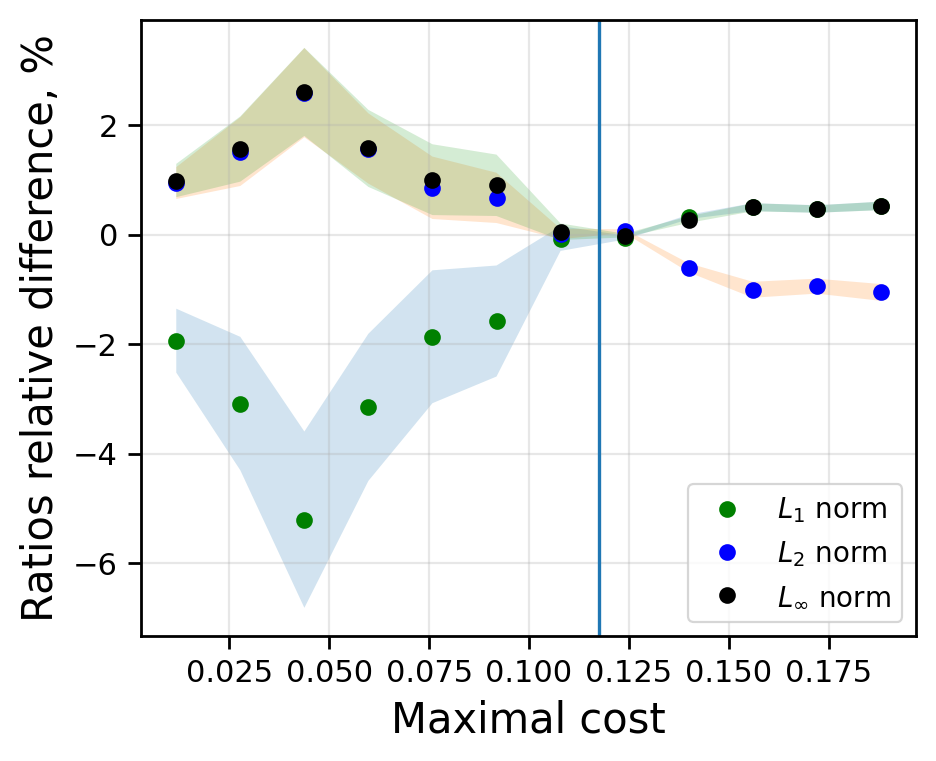

In [17]:
mmean = exp_ratios.mean(0)
print(mmean.shape)
colors = [ 'green', "blue", 'black']
names = [r"$L_1$ norm",r"$L_2$ norm",r"$L_\infty$ norm"]
fig, ax = get_fig_set_style(None, (1,1), (5,4))
# plt.figure(figsize = (5,4), dpi = 200)
ax.axvline(x=np.mean(budgets_used))
for i, r in enumerate(exp_ratios):
    ratios = r
    ratios_diff = ((mmean - ratios)/(mmean)).T
    ratios__diff_stat = np.array([(np.mean(r), np.std(r)) for r in ratios_diff]).T * 100
    # colors =  np.linspace(0, 2., len(max_budgets))
    # plt.scatter(max_budgets, (ratios_diff).mean(1), c = colors, ec = 'k')
    print(budgets, i)
    ax.plot(budgets, ratios__diff_stat[0], '.', color = colors[i], label = f"{names[i]}")
    ax.fill_between(budgets, ratios__diff_stat[0] - ratios__diff_stat[1], 
                    ratios__diff_stat[0] + ratios__diff_stat[1], alpha = 0.2)
ax.ticklabel_format(axis="x", scilimits=[-3, 3])
ax.grid(which="major", alpha=0.3)
ax.legend(loc="lower right")
ax.set_ylabel("Ratios relative difference, %", fontsize = 15)
ax.set_xlabel(x1, fontsize = 15)

In [ ]:
оуцоашдуоадфорадшфрадфрыардамдыародыроддлфдлыфвдлаылвд выаыв. вы ватыфвадыводаодывоалы